# The Battle of the Neighborhoods Notebook

## Data Aquisition & Cleaning

We begin by importing the demographic data that we downloaded from Toronto's official website.

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
# We look at the shape of the df. That is one enormous dataframe.
toronto_df.shape

(2383, 146)

In [3]:
# We take a quick look at the df.
toronto_df.head(2)

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood


### Now, let's scan through the characteristic column to see if we can find any useful features.

In [4]:
for char in toronto_df['Characteristic']:
    print(char, end = '|\n')

Neighbourhood Number|
TSNS2020 Designation|
Population, 2016|
Population, 2011|
Population Change 2011-2016|
Total private dwellings|
Private dwellings occupied by usual residents|
Population density per square kilometre|
Land area in square kilometres|
Children (0-14 years)|
Youth (15-24 years)|
Working Age (25-54 years)|
Pre-retirement (55-64 years)|
Seniors (65+ years)|
Older Seniors (85+ years)|
Male: 0 to 04 years|
Male: 05 to 09 years|
Male: 10 to 14 years|
Male: 15 to 19 years|
Male: 20 to 24 years|
Male: 25 to 29 years|
Male: 30 to 34 years|
Male: 35 to 39 years|
Male: 40 to 44 years|
Male: 45 to 49 years|
Male: 50 to 54 years|
Male: 55 to 59 years|
Male: 60 to 64 years|
Male: 65 to 69 years|
Male: 70 to 74 years|
Male: 75 to 79 years|
Female: 10 to 14 years|
Male: 80 to 84 years|
Male: 85 to 89 years|
Male: 90 to 94 years|
Male: 95 to 99 years|
Male: 100 years and over|
Female: 0 to 04 years|
Female: 05 to 09 years|
Female: 15 to 19 years|
Female: 20 to 24 years|
Female: 25 to

# Based on the above characteristics, the following features look interesting:

#### We will definitely include these ones in our analysis:
* Population, 2016: A higher population should lead to more gyms.
* Total private dwellings: A more wealthy population means more resources that can go towards gym memberships.
* Land area in square kilometres: A greater land area means more room for gym locations.
* Children (0-14 years): More children could mean more gyms because these children will become adults in a couple years and then be interested in the gym.
* Youth (15-24 years): Youth are especially interested in going to the gym and staying fit.
* Working Age (25-54 years): A higher population of these individuals means more gyms.
* Pre-retirement (55-64 years): A higher population of these individuals means more gyms.
* Seniors (65+ years): A higher population of these individuals means more gyms.
* Older Seniors (85+ years): A higher population of these individuals means more gyms.
* Employment rate: Higher employment means higher income, which means more money for gym memberships.
* Unemployment rate: Higher unemployment should reduce income, leading to less gyms.
* Income taxes: Average amount (\$): Income taxes lower disposable income available to spend on gym memberships.
* After-tax income: Average amount (\$): More income to spend on gym memberships.

#### We will possibly include these ones in our analysis:
* No certificate, diploma or degree: Maybe less educated individuals are less likely to go the gym?
* Secondary (high) school diploma or equivalency certificate: How likely to go to the gym are moderately educated individuals?
* University certificate, diploma or degree at bachelor level or above: How likely to go to the gym are highly educated individuals?

### Let's do some data cleaning now:

In [5]:
# We set the index to be the characteristic.
toronto_df.set_index('Characteristic', inplace = True)

# We strip all white space from the index.
toronto_df.index = toronto_df.index.str.strip()

In [6]:
# We select the features that we decided on.

toronto_df = toronto_df.loc[['Population, 2016', 'Total private dwellings', 'Land area in square kilometres', 'Children (0-14 years)', 'Youth (15-24 years)', 
                'Working Age (25-54 years)', 'Pre-retirement (55-64 years)', 'Seniors (65+ years)', 'Older Seniors (85+ years)', 
               'Employment rate', 'Unemployment rate', 'Income taxes: Average amount ($)', 'After-tax income: Average amount ($)']]

In [7]:
# Let's drop a few unecessary columns.
toronto_df.drop(columns = ['_id', 'Category', 'Topic', 'Data Source', 'City of Toronto'], inplace = True)

In [8]:
# We transpose the dataframe.
toronto_df = toronto_df.transpose()

In [9]:
# The dataframe shape is now a lot more manageable.
toronto_df.shape

(140, 13)

In [10]:
# We give our index a name.
toronto_df.index.name = 'Neighborhood'

In [11]:
# We search for missing values.
toronto_df.isna().sum().sum()

# There are no missing values.

0

### Now, let's do some geocoding and convert our physical addresses into geographical coordinates.

In [12]:
# We install the packages we need if we don't already have them.
try:
    import numpy as np
    import geopandas
    import geopy
    from geopy.geocoders import Nominatim
except:
    ! pip install geopandas
    ! pip install geopy
    import numpy as np
    import geopandas
    import geopy
    from geopy.geocoders import Nominatim

print('Your packages have been installed and imported.')

     |████████████████████████████████| 962 kB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 36.9 MB/s eta 0:00:01�██▌           | 9.5 MB 36.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 32.1 MB/s eta 0:00:01
Your packages have been installed and imported.


In [13]:
# We create our geocoding instance.
geocoder = Nominatim(user_agent = 'Toronto Locations')

In [14]:
# We find the latitude and longitude of the following neighborhoods.

latitude_dict = {}
longitude_dict = {}

for neighborhood in toronto_df.index:
    try:
        address = neighborhood + ', Toronto, Canada'
        location = geocoder.geocode(address)
        latitude_dict[neighborhood] = location.latitude
        longitude_dict[neighborhood] = location.longitude
    except:
        latitude_dict[neighborhood] = 0
        longitude_dict[neighborhood] = 0

In [15]:
# The above process really takes some time. To make things easier, let's throw the values into a dataframe and create a csv file.
# We didn't complete this section. Let's not worry about it right now.

"""

lat_long_df = pd.DataFrame({'Latitude':latitude_dict.values(), 'Longitude':longitude_dict.values()})

from project_lib import Project
project = Project(sc,"<my_project_id>","<my_project_token>")
project.save_data(file_name = "mypanda.csv",data = lat_long_df.to_csv(index=False)) 

"""

'\n\nlat_long_df = pd.DataFrame({\'Latitude\':latitude_dict.values(), \'Longitude\':longitude_dict.values()})\n\nfrom project_lib import Project\nproject = Project(sc,"<my_project_id>","<my_project_token>")\nproject.save_data(file_name = "mypanda.csv",data = lat_long_df.to_csv(index=False)) \n\n'

In [16]:
# There are 140 neighborhoods in Toronto. We count how many of the locations the library was able to locate. Unfortunately, it was only able to locate 96.

counter = 0

for value in latitude_dict.values():
    if bool(value) == True:
        counter += 1
        
counter

96

In [17]:
# Let's add the latitude and longitude of these locations to our dataframe.
toronto_df['Latitude'] = latitude_dict.values()
toronto_df['Longitude'] = longitude_dict.values()

In [18]:
# It's time to get rid of the neighborhoods that don't have latitude data. These data points have a value of zero.

lat_filter = toronto_df['Latitude'] != 0
toronto_df = toronto_df[lat_filter]

# Now, let's make sure these columns no longer have zeros. Because the shape is 96, we know that the other neighborhoods are now gone.
toronto_df.shape

# Let's look at the head of our dataframe.
toronto_df.head(3)

Characteristic,"Population, 2016",Total private dwellings,Land area in square kilometres,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Employment rate,Unemployment rate,Income taxes: Average amount ($),After-tax income: Average amount ($),Latitude,Longitude
Neighborhood,,,,,,,,,,,,,,,
Agincourt North,"29,113","9,371",7.41,"3,840","3,705","11,305","4,230","6,045",925,50,9.8,"6,726","26,955",43.808038,-79.266439
Alderwood,"12,054","4,732",4.95,"1,760","1,235","5,220","1,825","2,015",320,62.4,6.1,"11,626","39,159",43.601717,-79.545232
Annex,"30,526","18,109",2.81,"2,360","3,750","15,040","3,480","5,910","1,040",65.8,6.7,"45,973","80,138",43.670338,-79.407117


### Let's review our data types:

In [19]:
# Let's do a quick review the data types of our dataframe. All of the data is of type object. That definitely needs to be fixed.
toronto_df.dtypes.head(2)

Characteristic
Population, 2016           object
Total private dwellings    object
dtype: object

In [20]:
for column in toronto_df.columns:
    if toronto_df[column].dtype == 'object':
        toronto_df[column] = toronto_df[column].str.replace(',', '')
        toronto_df[column] = toronto_df[column].astype('float')

In [21]:
# The data types are all either integers or floats, which is great.
toronto_df.dtypes.head()

Characteristic
Population, 2016                  float64
Total private dwellings           float64
Land area in square kilometres    float64
Children (0-14 years)             float64
Youth (15-24 years)               float64
dtype: object

In [22]:
# Here's our final dataframe. It looks good.
toronto_df.head()

Characteristic,"Population, 2016",Total private dwellings,Land area in square kilometres,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Employment rate,Unemployment rate,Income taxes: Average amount ($),After-tax income: Average amount ($),Latitude,Longitude
Neighborhood,,,,,,,,,,,,,,,
Agincourt North,29113.0,9371.0,7.41,3840.0,3705.0,11305.0,4230.0,6045.0,925.0,50.0,9.8,6726.0,26955.0,43.808038,-79.266439
Alderwood,12054.0,4732.0,4.95,1760.0,1235.0,5220.0,1825.0,2015.0,320.0,62.4,6.1,11626.0,39159.0,43.601717,-79.545232
Annex,30526.0,18109.0,2.81,2360.0,3750.0,15040.0,3480.0,5910.0,1040.0,65.8,6.7,45973.0,80138.0,43.670338,-79.407117
Banbury-Don Mills,27695.0,12473.0,9.98,3605.0,2730.0,10810.0,3555.0,6975.0,1640.0,55.6,7.2,21829.0,51874.0,43.751672,-79.370169
Bathurst Manor,15873.0,6418.0,4.70,2325.0,1940.0,6655.0,2030.0,2940.0,710.0,60.3,7.2,12656.0,37927.0,43.665519,-79.411937


### Our dataframe is finally looking really nice. Let's move on to the next step.

### It's time to use Folium to plot a circular marker on all of the different neighborhoods.

In [23]:
# We install folium if it hasn't already been installed.

try:
    import folium
except:
    ! pip install folium
    import folium

print('Folium has been installed')

# We import folium.
import folium

     |████████████████████████████████| 93 kB 2.7 MB/s  eta 0:00:01
Folium has been installed


In [24]:
# The latitude and longitude of Toronto, Canada are assigned below.
lat = 43.651070
long = -79.347015

# It's time to create our first map of Toronto.
map_toronto = folium.Map(location = [lat, long], zoom_start = 11)

# Let's add some circle markers to our map by putting our data through a for loop.
for lat, lon, neigh in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df.index):
    
    # We create the label that we will be putting on the points.
    label = str(neigh)
    
    # We create circle markers for our neighborhoods.
    folium.CircleMarker(location = [lat, lon], radius = 5, popup = label, fill=True, color = 'blue', 
                        fill_color = 'blue', fill_opacity=0.7).add_to(map_toronto)
    
# We look at our map.
map_toronto

### It's time to use FourSquare to find out more about the restaurants that exist in this neighborhood.

### We install our packages and then we perform some simple kilometer calculations.

In [25]:
# Let's install and import our packages if we haven't already.

import requests

try:
    import foursquare
except:
    ! pip install foursquare
    import foursquare

print('Your packages have been imported and installed.')

Your packages have been imported and installed.


In [26]:
# We calculate the meters in all directions based on square kilometers. We make the assumption that each neighborhood is a perfect square.
toronto_df['Meters in all directions'] = ((toronto_df['Land area in square kilometres'] * 1000) ** 1/2) / 2

In [27]:
toronto_df.head()

Characteristic,"Population, 2016",Total private dwellings,Land area in square kilometres,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Employment rate,Unemployment rate,Income taxes: Average amount ($),After-tax income: Average amount ($),Latitude,Longitude,Meters in all directions
Neighborhood,,,,,,,,,,,,,,,,
Agincourt North,29113.0,9371.0,7.41,3840.0,3705.0,11305.0,4230.0,6045.0,925.0,50.0,9.8,6726.0,26955.0,43.808038,-79.266439,1852.5
Alderwood,12054.0,4732.0,4.95,1760.0,1235.0,5220.0,1825.0,2015.0,320.0,62.4,6.1,11626.0,39159.0,43.601717,-79.545232,1237.5
Annex,30526.0,18109.0,2.81,2360.0,3750.0,15040.0,3480.0,5910.0,1040.0,65.8,6.7,45973.0,80138.0,43.670338,-79.407117,702.5
Banbury-Don Mills,27695.0,12473.0,9.98,3605.0,2730.0,10810.0,3555.0,6975.0,1640.0,55.6,7.2,21829.0,51874.0,43.751672,-79.370169,2495.0
Bathurst Manor,15873.0,6418.0,4.70,2325.0,1940.0,6655.0,2030.0,2940.0,710.0,60.3,7.2,12656.0,37927.0,43.665519,-79.411937,1175.0


In [28]:
# The code was removed by Watson Studio for sharing.

In [29]:
# It's time to create a loop to create our search URL and number of gyms for each location.

gym_dict = {}

for neigh, lat, long, radius in zip(toronto_df.index, toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Meters in all directions']):
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, search_query, radius, LIMIT)
    
    # It's time to make our request and output it in JSON format.
    results = requests.get(url).json()

    # We grab the critical data.
    venues = results['response']['venues']

    # We turn the data into a dataframe.
    fsqr_df = pd.json_normalize(venues)

    # We calculate how many results were generated.
    no_of_gyms = len(fsqr_df)
    
    # We append that value onto the list.
    gym_dict[neigh] = no_of_gyms

# We add the list as a dataframe column.
toronto_df['Number of Gyms'] = gym_dict.values()

## 3. Exploratory Data Analysis

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

In [30]:
# Let's look at some quick descriptive statistics.
toronto_df.describe()

Characteristic,"Population, 2016",Total private dwellings,Land area in square kilometres,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Employment rate,Unemployment rate,Income taxes: Average amount ($),After-tax income: Average amount ($),Latitude,Longitude,Meters in all directions,Number of Gyms
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,19029.010417,8115.093750,4.426458,2772.604167,2386.822917,8502.656250,2336.718750,3030.000000,471.354167,58.989583,8.391667,16954.937500,43059.635417,43.710189,-79.384931,1106.614583,5.145833
std,9557.208428,4222.032305,5.134549,1581.904578,1465.883445,4600.601388,1191.328279,1641.150271,309.482998,6.734069,2.002192,16027.192878,22553.619102,0.053932,0.104151,1283.637358,10.002083
min,7607.000000,3344.000000,0.420000,565.000000,735.000000,3245.000000,650.000000,730.000000,50.000000,47.300000,4.500000,4750.000000,23786.000000,43.592005,-79.597457,105.000000,0.000000
25%,12019.500000,5342.750000,1.867500,1666.250000,1437.500000,5347.500000,1573.750000,1865.000000,258.750000,54.675000,6.900000,7527.750000,28873.250000,43.668432,-79.438114,466.875000,0.000000
50%,16360.000000,6875.000000,2.915000,2317.500000,2067.500000,7320.000000,1995.000000,2592.500000,367.500000,57.450000,8.250000,11990.000000,36552.000000,43.700066,-79.392653,728.750000,1.000000
75%,22214.500000,9790.250000,4.962500,3182.500000,2686.250000,10365.000000,2631.250000,3551.250000,626.250000,64.800000,9.800000,17173.000000,44303.250000,43.753946,-79.313701,1240.625000,4.250000
max,53485.000000,23901.000000,36.890000,9625.000000,7660.000000,25850.000000,6690.000000,8990.000000,1640.000000,82.700000,14.600000,91781.000000,142627.000000,43.823174,-79.150768,9222.500000,50.000000


In [31]:
# Now, let's generate a correlation matrix to look at the early correlations between 'Number of Gyms' and the other variables.
# Note that we look at the absolute values of the correlations to find powerful correlations with 'Number of Gyms'.

toronto_df.corr()['Number of Gyms'].abs().sort_values(ascending = False)

Characteristic
Number of Gyms                          1.000000
Meters in all directions                0.574415
Land area in square kilometres          0.574415
Working Age (25-54 years)               0.523688
Total private dwellings                 0.487279
Population, 2016                        0.484216
Pre-retirement (55-64 years)            0.424326
Youth (15-24 years)                     0.418819
Children (0-14 years)                   0.348227
Seniors (65+ years)                     0.335895
Older Seniors (85+ years)               0.237430
Employment rate                         0.126564
Unemployment rate                       0.097023
Longitude                               0.047879
Latitude                                0.046122
Income taxes: Average amount ($)        0.042576
After-tax income: Average amount ($)    0.030666
Name: Number of Gyms, dtype: float64

In [32]:
# I suspect that the population variables correlated with one another, which might make them redundant. Let's test this theory.

toronto_df[['Pre-retirement (55-64 years)', 'Youth (15-24 years)', 'Children (0-14 years)', 
'Seniors (65+ years)', 'Older Seniors (85+ years)', 'Working Age (25-54 years)']].corr()

# As I suspected, the correlations are pretty high between different age groups. Not too surprising. Let's see if they have strong affects anyways.

Characteristic,Pre-retirement (55-64 years),Youth (15-24 years),Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Working Age (25-54 years)
Characteristic,,,,,,
Pre-retirement (55-64 years),1.000000,0.853153,0.866041,0.908651,0.675650,0.805399
Youth (15-24 years),0.853153,1.000000,0.817642,0.755151,0.509467,0.807950
Children (0-14 years),0.866041,0.817642,1.000000,0.726318,0.493040,0.710062
Seniors (65+ years),0.908651,0.755151,0.726318,1.000000,0.879429,0.687492
Older Seniors (85+ years),0.675650,0.509467,0.493040,0.879429,1.000000,0.486332
Working Age (25-54 years),0.805399,0.807950,0.710062,0.687492,0.486332,1.000000


## Let's now perform a regression analysis on our data. We need to import the necessary libraries.


In [33]:
# Let's now perform a regression analysis on our data. We need to import the necessary libraries.

try:
    import statsmodels.api as sm
    import sklearn as sklearn
except:
    ! pip install statsmodels
    ! pip install sklearn
    import statsmodels.api as sm
    import sklearn as sk

print('Your packages have been installed and imported.')

Your packages have been installed and imported.


In [34]:
# We need to define x and y.

x = toronto_df[['Population, 2016', 'Land area in square kilometres', 'Children (0-14 years)','Youth (15-24 years)', 
                'Working Age (25-54 years)','Pre-retirement (55-64 years)', 'Seniors (65+ years)', 'Employment rate', 
                'After-tax income: Average amount ($)']] 
      
y = toronto_df['Number of Gyms']

In [35]:
# Now, we create the linear model and view the summary. Overall, the results are surprisingly good. 
# The 63.9% of the variation in the number of gyms in each neighborhood can be explained by these independant variables.

# We create the model.
linear_model = sm.OLS(y, x)

# We fit the model.
fit_model = linear_model.fit()

# We view the summary.
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Number of Gyms   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              17.15
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                    6.48e-16
Time:                        05:38:25   Log-Likelihood:                         -319.19
No. Observations:                  96   AIC:                                      656.4
Df Residuals:                      87   BIC:                                      679.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Population, 2016                        -0.0708      0.037     -1.904      0.060      -0.145       0.003
Land area in square kilometres           1.3773      0.205      6.703      0.000       0.969       1.786
Children (0-14 years)                    0.0699      0.037      1.882      0.063      -0.004       0.144
Youth (15-24 years)                      0.0696      0.037      1.873      0.064      -0.004       0.143
Working Age (25-54 years)                0.0725      0.037      1.952      0.054      -0.001       0.146
Pre-retirement (55-64 years)             0.0673      0.037      1.811      0.074      -0.007       0.141
Seniors (65+ years)                      0.0706      0.037      1.893      0.062      -0.004       0.145
Employment rate                         -0.0857      0.042     -2.032      0.045      -0.170      -0.002
After-tax income: Average amount ($)  6.758e-05   3.72e-05      1.816      0.073    -6.4e-06       0.000
==============================================================================
Omnibus:                       97.349   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1168.726
Skew:                           3.286   Prob(JB):                    1.64e-254
Kurtosis:                      18.780   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Now, we can use our linear model to make predictions on the data and see how close the predictions are to reality.

x_predictions = fit_model.predict(x)
x_actual = toronto_df['Number of Gyms']

# Let's put this data in a dataframe.
no_of_gyms_df = pd.DataFrame({'Actual Number' : x_actual.values, 'Predicted Number' : x_predictions.values})

# We add a new critical column.
no_of_gyms_df['Predicted - Actual'] = no_of_gyms_df['Predicted Number'] - no_of_gyms_df['Actual Number']

# We set our index.
no_of_gyms_df.index = toronto_df.index

# We sort the values by our new column.
no_of_gyms_df.sort_values('Predicted - Actual', inplace = True, ascending = False)

# Here's our dataframe.
no_of_gyms_df

,Actual Number,Predicted Number,Predicted - Actual
Neighborhood,,,
Rouge,28,40.724454,12.724454
Humber Summit,0,8.737970,8.737970
York University Heights,8,15.920011,7.920011
Forest Hill South,0,7.611921,7.611921
Little Portugal,0,7.295435,7.295435
...,...,...,...
New Toronto,2,-7.676304,-9.676304
Mount Pleasant East,17,4.754718,-12.245282
Willowdale West,18,3.166649,-14.833351


#### The above dataframe has a few different critically important columns:

* Actual Number: The actual number of gyms for each neighborhood. This data was taken from Foursquare.
* Predicted Number: The predicted number of gyms for each neighborhood. This column also signifies the number of gyms that the neighborhood could support based on its population, income, and land mass.
* Predicted - Actual: The predicted number of gyms minus the actual number of gyms. This number represents how many gyms there is still potential demand for in the neighborhood. The higher this number, the more probable the chance of success for a gym that opens here.

## Let's do some plotting now.

In [37]:
# Let's import the plotting libraries.

try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except:
    ! pip install matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    
print('Your libraries have been installed and imported.')

Your libraries have been installed and imported.


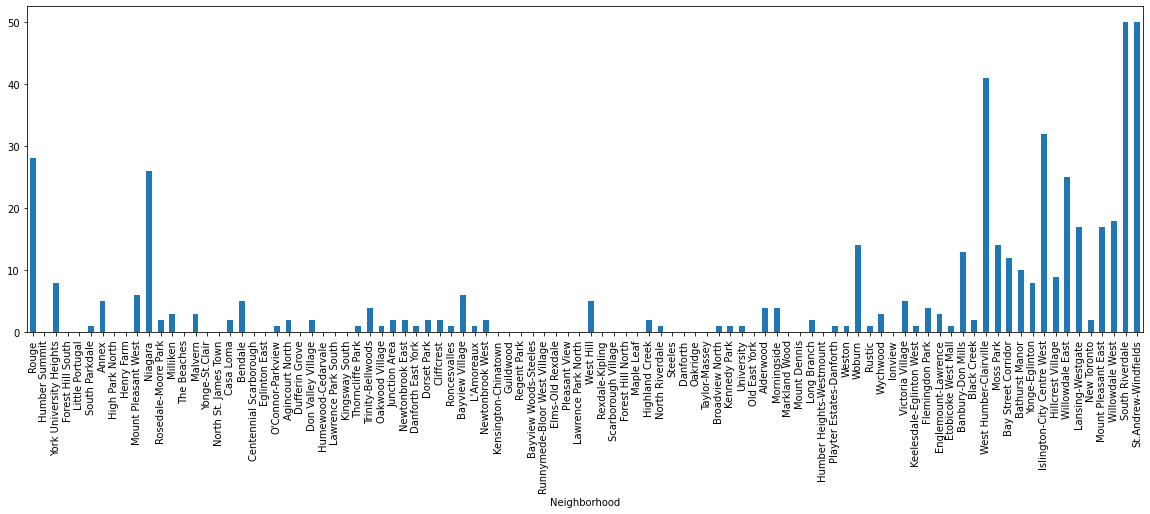

In [38]:
# Let's create a bar chart of the actual values.

no_of_gyms_df['Actual Number'].plot(kind = 'bar', figsize = (20,6))

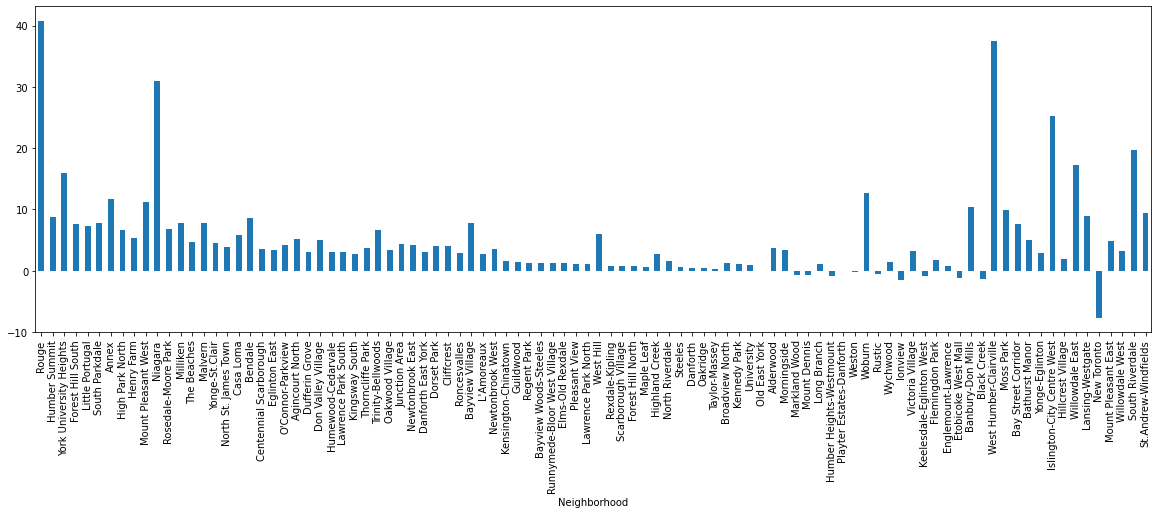

In [39]:
# Now, let's create a bar chart of the predicted values.

no_of_gyms_df['Predicted Number'].plot(kind = 'bar', figsize = (20,6))

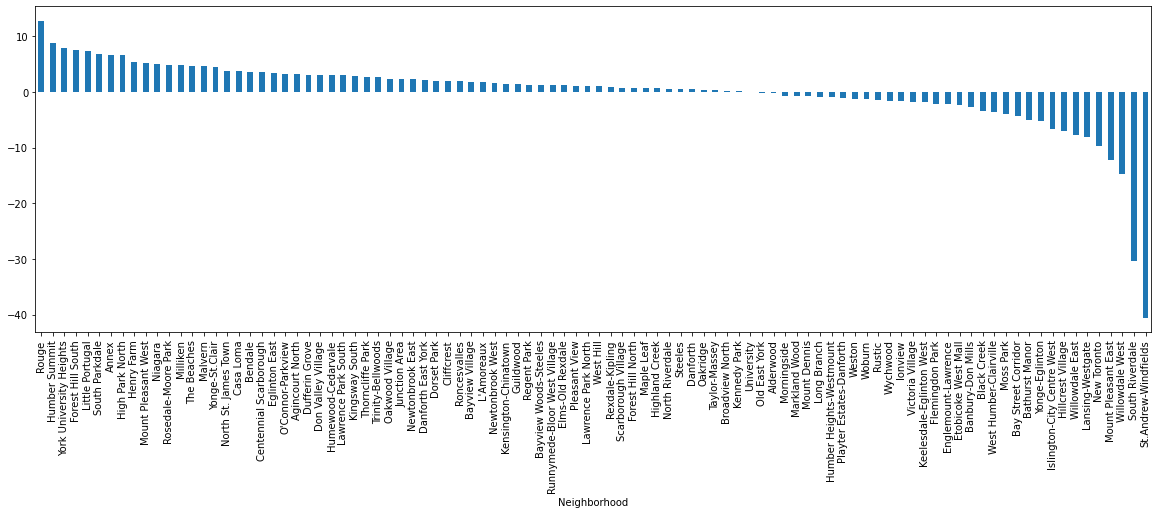

In [40]:
# Let's create a bar chart of the (predicted values minus the actual values) feature. It is sorted from highest to lowest.

no_of_gyms_df['Predicted - Actual'].plot(kind = 'bar', figsize = (20,6))

## 5. Recommendations

In [41]:
# The data has already been sorted. Let's just access the top 10 values.

no_of_gyms_df.head(10)

,Actual Number,Predicted Number,Predicted - Actual
Neighborhood,,,
Rouge,28,40.724454,12.724454
Humber Summit,0,8.737970,8.737970
York University Heights,8,15.920011,7.920011
Forest Hill South,0,7.611921,7.611921
Little Portugal,0,7.295435,7.295435
South Parkdale,1,7.779929,6.779929
Annex,5,11.627072,6.627072
High Park North,0,6.562847,6.562847
Henry Farm,0,5.342249,5.342249


In terms of the 'Predicted - Actual' feature, the following neighborhoods are the best locations to open up a new gym:

1. Rouge
2. Humber Summit
3. York University Heights
4. Forest Hill South
5. Little Portugal
6. South Parkdale
7. Annex
8. High Park North
9. Henry Farm
10. Mount Pleasant West

Our suggestion for Jimmy is to begin at the top of this list with Rouge, which currently has a 'deficit' of ~13 gyms and see if he can find a place to open his new gym. If he is unable to locate a place for his gym, it is suggested that he move to the next neighborhood until he finds a location that he is comfortable with.

In [42]:
# Let's take a look at where there are too many gyms.
# The data has already been sorted. Let's just access the bottom 10 values.

no_of_gyms_df.tail(10)

,Actual Number,Predicted Number,Predicted - Actual
Neighborhood,,,
Yonge-Eglinton,8,2.823724,-5.176276
Islington-City Centre West,32,25.278526,-6.721474
Hillcrest Village,9,1.887686,-7.112314
Willowdale East,25,17.255570,-7.744430
Lansing-Westgate,17,8.981203,-8.018797
New Toronto,2,-7.676304,-9.676304
Mount Pleasant East,17,4.754718,-12.245282
Willowdale West,18,3.166649,-14.833351
South Riverdale,50,19.617831,-30.382169


Above, we see the gyms with the lowest absolute 'Predicted - Actual' feature values. According to our model, these neighborhoods already have way too many gyms for their area, population, and income. It is possible that some of these gyms may go out of business in the near future due to the 'excess' number of gyms. Under no circumstances should Jimmy consider opening up a gym at any of the following neighborhoods:

1. Yonge-Eglinton
2. Islington-City Centre West
3. Hillcrest Village
4. Willowdale East
5. Lansing-Westgate
6. New Toronto
7. Mount Pleasant East
8. Willowdale West
9. South Riverdale
10. St.Andrew-Windfields